In [1]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter

In [2]:
def load_xvg_file(filename):
    x, y = [], []
    with open(filename) as f:
        for line in f:
            cols = line.split()
            if len(cols)==2:
                x.append(cols[0])
                y.append(cols[1])
    return np.array(x[1:],dtype=float),np.array(y[1:],dtype=float) #skip the first value (header)


In [3]:
def gaussian(x,a,b,c):
    return np.abs(a)*np.exp(-4*np.log(2)*(x-b)**2./(c**2))

def fit(function,x,y,p0=None,sigma=None,bounds=None):
    '''
    fits a function and return the fit resulting parameters and curve
    '''
    popt,pcov = curve_fit(function,x,y,p0=p0,sigma=sigma)
    #x = np.arange(min(x),max(x),x[1]-x[0])
    curve = function(x,*popt)
    perr = np.sqrt(np.diag(pcov))
    return popt,x,curve,perr

<IPython.core.display.Javascript object>


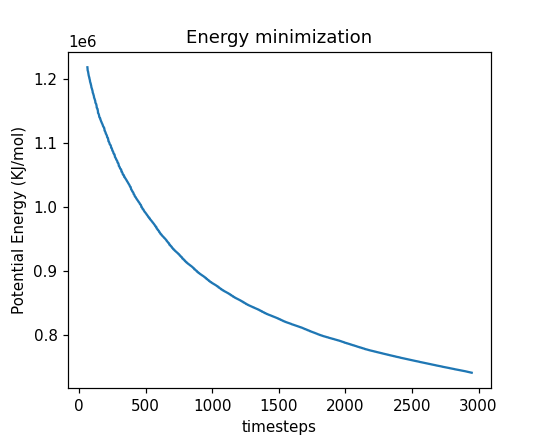

Text(0.5, 1.0, 'Energy minimization')

In [4]:
plt.figure(figsize=[5,4])

filename = "em_potential.xvg"
x,y = load_xvg_file(filename)
plt.plot(x[50:],y[50:],lw=1.5)
plt.ylabel('Potential Energy (KJ/mol)')
plt.xlabel('timesteps')

plt.title('Energy minimization')

<IPython.core.display.Javascript object>


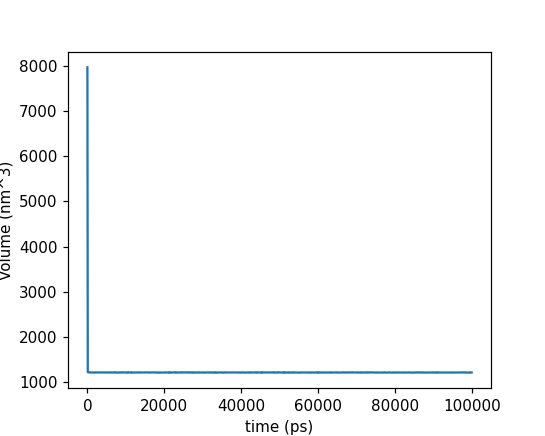

Text(0.5, 0, 'time (ps)')

In [5]:
plt.figure(figsize=[5,4])

filename = "npt_volume.xvg"
x,y = load_xvg_file(filename)
plt.plot(x[:],y[:],lw=1.5)
plt.ylabel('Volume (nm^3)')
plt.xlabel('time (ps)')

In [7]:
# number of proteins
n = 10

# volume
# 1 ml = 1.0E+21 nm^-3
v = y[-1]*1e-21

# mass
# 1 lysozyme 14 kDa
# 1 kDa = 1.66054e-18 mgr
m = 14*1.66054e-18

c = 10*m/v
print(c,"mg/ml")

191.03455671240926 mg/ml


<IPython.core.display.Javascript object>


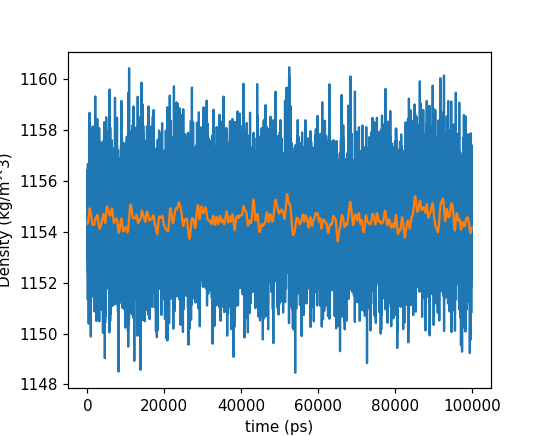

Text(0.5, 0, 'time (ps)')

In [8]:
plt.figure(figsize=[5,4])

filename = "md_density.xvg"
x,y = load_xvg_file(filename)
plt.plot(x,y,lw=1.5)
plt.plot(x,gaussian_filter(y,sigma=20),lw=1.5)
plt.ylabel('Density (kg/m^3)')
plt.xlabel('time (ps)')

<IPython.core.display.Javascript object>


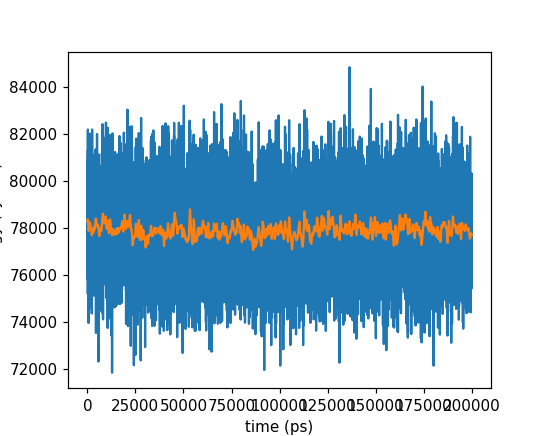

Text(0.5, 0, 'time (ps)')

In [9]:
plt.figure(figsize=[5,4])

filename = "md_energy.xvg"
x,y = load_xvg_file(filename)
plt.plot(x,y,lw=1.5)
plt.plot(x,gaussian_filter(y,sigma=20),lw=1.5)
plt.ylabel('Energy (kJ/mol)')
plt.xlabel('time (ps)')

<IPython.core.display.Javascript object>


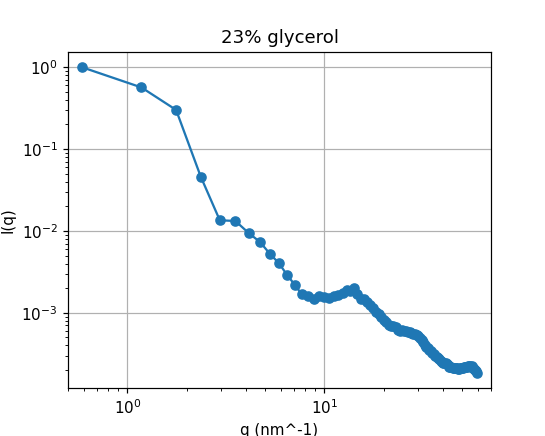

In [23]:
plt.figure(figsize=[5,4])

#filename = "saxs.xvg"
#x,y = load_xvg_file(filename)
#plt.plot(x,y/max(y),lw=1.5)

filename = "saxs2.xvg"
x,y = load_xvg_file(filename)
plt.plot(x[1:],y[1:]/max(y),'o-',lw=1.5)
plt.yscale("log")
plt.xscale("log")
plt.ylabel('I(q)')
plt.xlabel('q (nm^-1)')
plt.grid()
plt.xlim([0.5,70])
plt.title('23% glycerol')
plt.savefig("/Users/fivos/Desktop/fig.png")

<IPython.core.display.Javascript object>


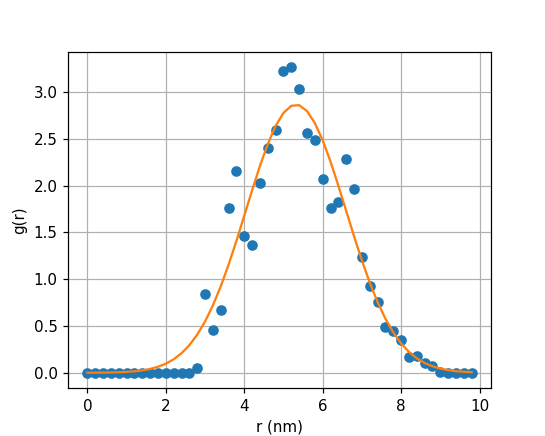

In [4]:
plt.figure(figsize=[5,4])

#filename = "saxs.xvg"
#x,y = load_xvg_file(filename)
#plt.plot(x,y/max(y),lw=1.5)

filename = "rdf.xvg"
x,y = load_xvg_file(filename)
#plt.plot(x,y,lw=1.5)

filename = "rdf_com.xvg"
x,y = load_xvg_file(filename)
plt.plot(x,y,'o',lw=1.5)
popt,xc,curve,perr = fit(gaussian,x,y)
plt.plot(xc,curve,lw=1.5)

plt.ylabel('g(r)')
plt.xlabel('r (nm)')
plt.grid()
#plt.title('23% glycerol')
#plt.yscale("log")
#plt.savefig("/Users/fivos/Desktop/fig.png")
plt.show()

<IPython.core.display.Javascript object>


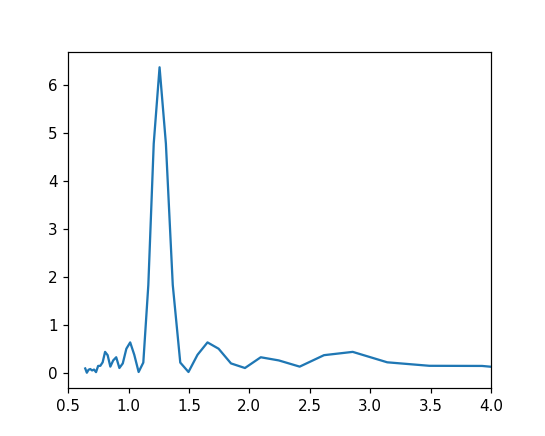

/var/folders/6s/3zb4x9wd0p74brccxsm88x800000gn/T/ipykernel_34582/2570701255.py:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(2*np.pi/xc, y_fft)


In [5]:
plt.figure(figsize=[5,4])

y_fft = np.fft.fftshift(np.abs(np.fft.fft(y))) / np.sqrt(len(y))
plt.plot(2*np.pi/xc, y_fft)

y_fft_curve = np.fft.fftshift(np.abs(np.fft.fft(curve))) / np.sqrt(len(curve))
#plt.plot(2*np.pi/xc, y_fft_curve)
plt.xlim(0.5,4)

plt.show()

<IPython.core.display.Javascript object>


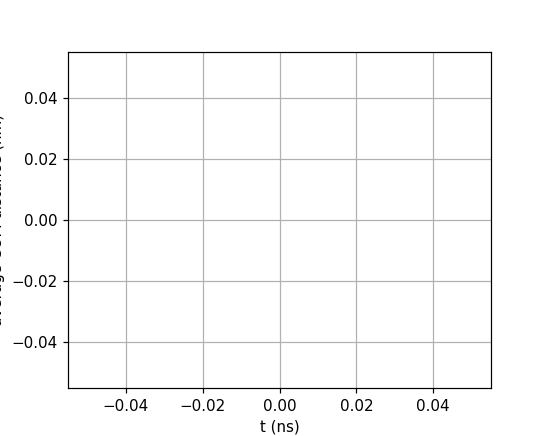

[]
[]


In [22]:

plt.figure(figsize=[5,4])

#filename = "saxs.xvg"
#x,y = load_xvg_file(filename)
#plt.plot(x,y/max(y),lw=1.5)

filename = "dist_com.xvg"
data = np.array(load_xvg_file(filename))
print(data[1])
plt.plot(x/1e3,y,lw=1.5)
plt.plot(x/1e3,gaussian_filter(y,sigma=20),lw=1.5)
print(y)
plt.ylabel('average COM distance (nm)')
plt.xlabel('t (ns)')
plt.grid()
#plt.title('23% glycerol')
#plt.yscale("log")
#plt.savefig("/Users/fivos/Desktop/fig.png")
plt.show()
